In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
df = pd.read_csv('/home/kamil/Dokumenty/datasets/human_resources/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
np.unique(df.sales)

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

# How many workers left their job?

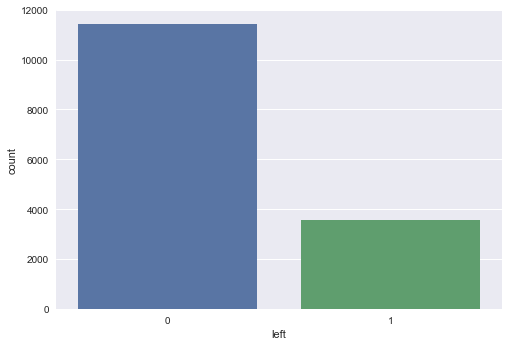

In [8]:
sns.countplot(df.left)

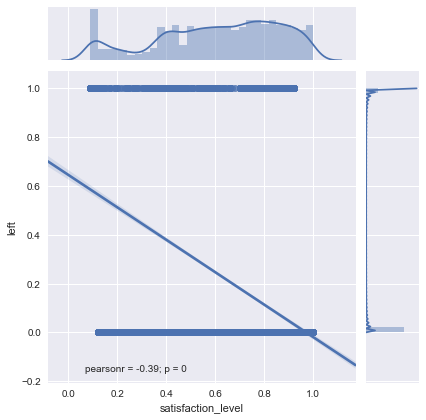

In [9]:
sns.jointplot(x='satisfaction_level', y='left', data=df, kind='reg')

Unsatisfaction of a worker has a influence on their leaving.

# Number of employees by occupation

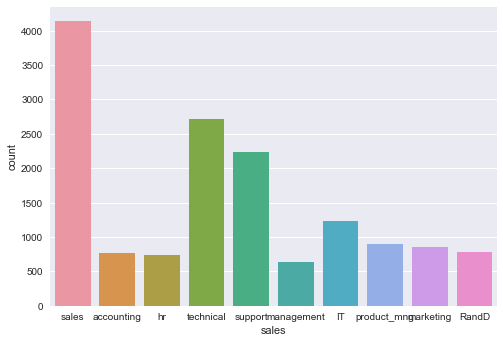

In [10]:
sns.countplot(x='sales', data=df)

# Salary by occupation

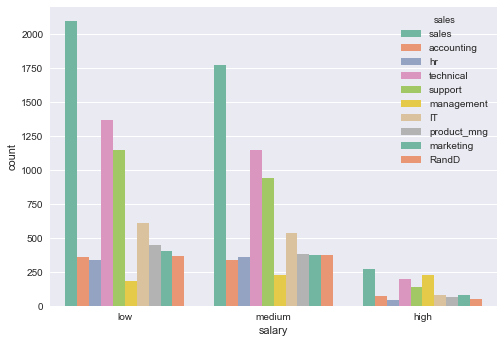

In [11]:
sns.countplot(x='salary', hue='sales', data=df, palette='Set2')

## conversion of `salary` to numeric

In [12]:
df.salary = df.salary.astype('category').cat.reorder_categories(['low', 'medium', 'high'])

In [13]:
salary_numeric = pd.DataFrame(df.salary.cat.codes)
salary_numeric.columns = ['salary']

In [14]:
df = df.drop(['salary'], 1).join(salary_numeric)

# Comparison of salary of those who left vs those who stayed.

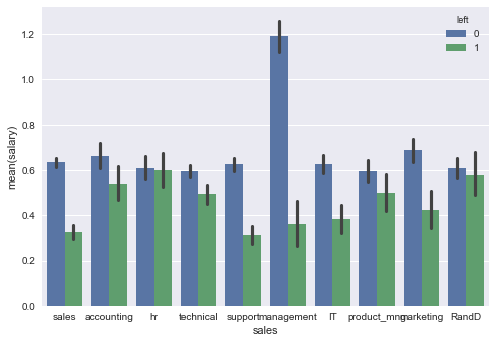

In [15]:
sns.barplot(x='sales', y='salary', hue='left', data=df)

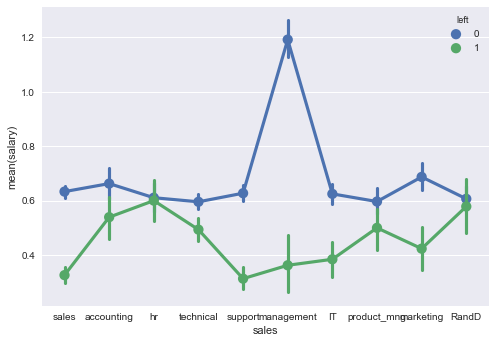

In [16]:
sns.pointplot(x='sales', y='salary', hue='left', data=df)

<b>People who left, on average, used to earn less. What does the correlation look like?</b>

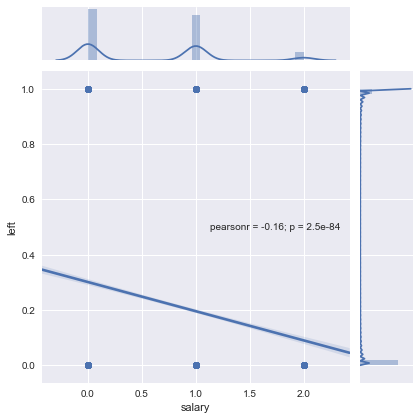

In [17]:
sns.jointplot(x='salary', y='left', data=df, kind='reg')

# Salary distibution

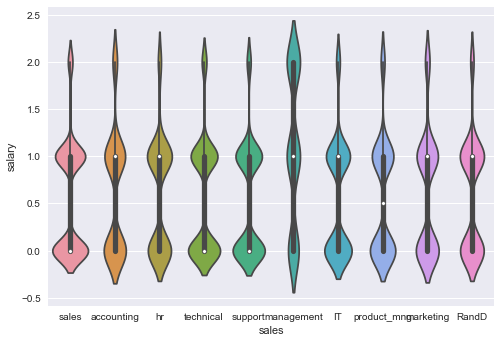

In [18]:
sns.violinplot(x='sales', y='salary', data=df, inner='box')

# Correlation

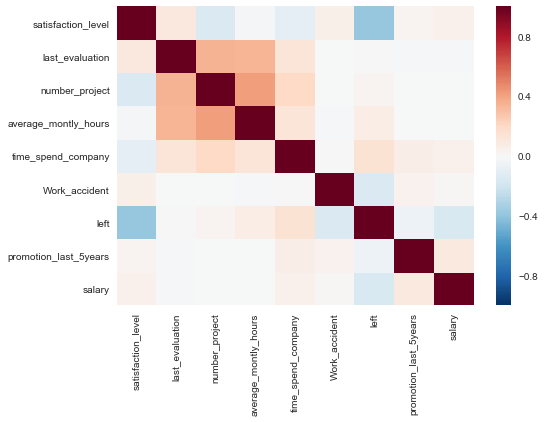

In [19]:
sns.heatmap(df.corr())

Correlation shows a linear relationship between `left` and `satisfaction_level`

# How many people had accidents?

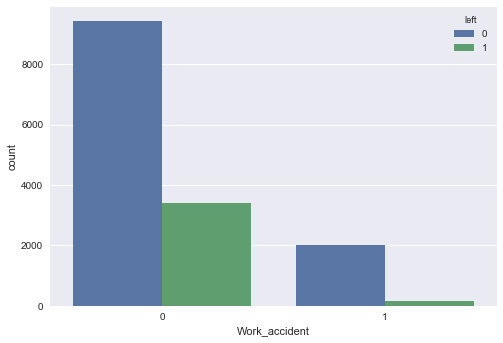

In [20]:
sns.countplot(x='Work_accident', hue='left', data=df)

# Building a predictive model with RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
forest = RandomForestClassifier(1000)

In [23]:
sales_dummies = pd.get_dummies(df.sales)

In [24]:
df = df.drop(['sales'], 1).join(sales_dummies)

In [25]:
X = df.drop(['left'], 1)
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [26]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [27]:
print(f"Model accuracy: {forest.score(X_test, y_test) * 100.}%")

Model accuracy: 99.17777777777778%


## Which features are the most important?

In [28]:
importances = forest.feature_importances_

In [29]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

In [30]:
indices = np.argsort(importances)[::-1]

In [31]:
print("Feature ranking:")

Feature ranking:


In [32]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.310259)
2. feature 4 (0.185539)
3. feature 2 (0.184089)
4. feature 3 (0.151491)
5. feature 1 (0.124255)
6. feature 7 (0.012969)
7. feature 5 (0.009000)
8. feature 17 (0.003682)
9. feature 15 (0.003329)
10. feature 16 (0.002946)
11. feature 8 (0.001881)
12. feature 9 (0.001812)
13. feature 11 (0.001667)
14. feature 10 (0.001604)
15. feature 12 (0.001573)
16. feature 6 (0.001573)
17. feature 13 (0.001212)
18. feature 14 (0.001118)


In [33]:
importances_df = pd.DataFrame(importances)
importances_df.columns=['importance']
columns_df = pd.DataFrame(df.drop('left', 1).columns.tolist())
columns_df.columns=['name']

In [34]:
importances_df = importances_df.join(columns_df)

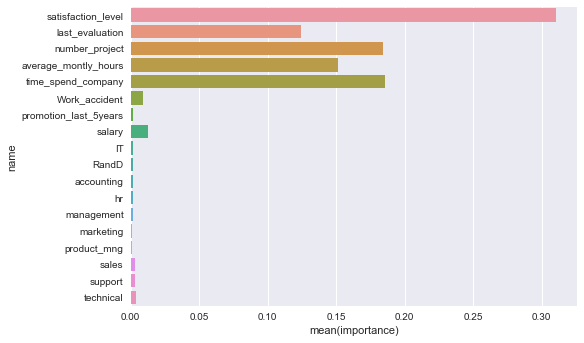

In [35]:
sns.barplot(x='importance', y='name', data=importances_df)

Most important features:
1. satisfaction_level
2. time_spend_company
3. number_project
4. average_montly_hours
5. last_evaluation